# Importing the necessary Libraries

In [485]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


# Reading the data

In [486]:
Data = pd.read_csv(r"C:\Users\navee\Data Science portfolio\Forest Fires in Brazil\amazon.csv",encoding='iso-8859-1',parse_dates=['date'])
Data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [487]:
Data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [488]:
Data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [489]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [490]:
Data.shape

(6454, 5)

In [491]:
Data.describe(include='all')

C:\Users\navee\AppData\Local\Temp/ipykernel_7836/277930036.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Data.describe(include='all')


,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01 00:00:00
freq,NaN,717,541,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN


# Checking the Duplicated data and Dropping them

In [492]:
Data.duplicated().values.any()

True

In [493]:
Data = Data.drop_duplicates()

In [494]:
Data.shape

(6422, 5)

# Checking the Null values 

In [495]:
Data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# Renaming the Month Values

In [496]:
Data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [497]:
Data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [498]:
Data['Month'] = Data['month'].map({'Janeiro':'Jan',
                   'Fevereiro':'Feb',
                   'Março':'Mar',
                   'Abril':'Apr',
                   'Maio':'May',
                   'Junho':'Jun',
                   'Julho':'July',
                   'Agosto':'Aug',
                   'Setembro': 'Sep',
                   'Outubro':'Oct',
                   'Novembro':'Nov',
                   'Dezembro':'Dec'})

C:\Users\navee\AppData\Local\Temp/ipykernel_7836/2489588922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Month'] = Data['month'].map({'Janeiro':'Jan',


In [499]:
Data.head()

,year,state,month,number,date,Month
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


# Finding the total Number of Fires registered

In [500]:
Data.shape

(6422, 6)

# In Which Month Maximum Number of Forest Fires Were Registere

In [501]:
Data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month'], dtype='object')

In [502]:
Max_f = Data.groupby('Month')['number'].sum().reset_index()
Max_f

,Month,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,July,92319.113
6,Jun,55997.675
7,Mar,30709.405
8,May,34725.363
9,Nov,85508.054


Text(0, 0.5, 'number')

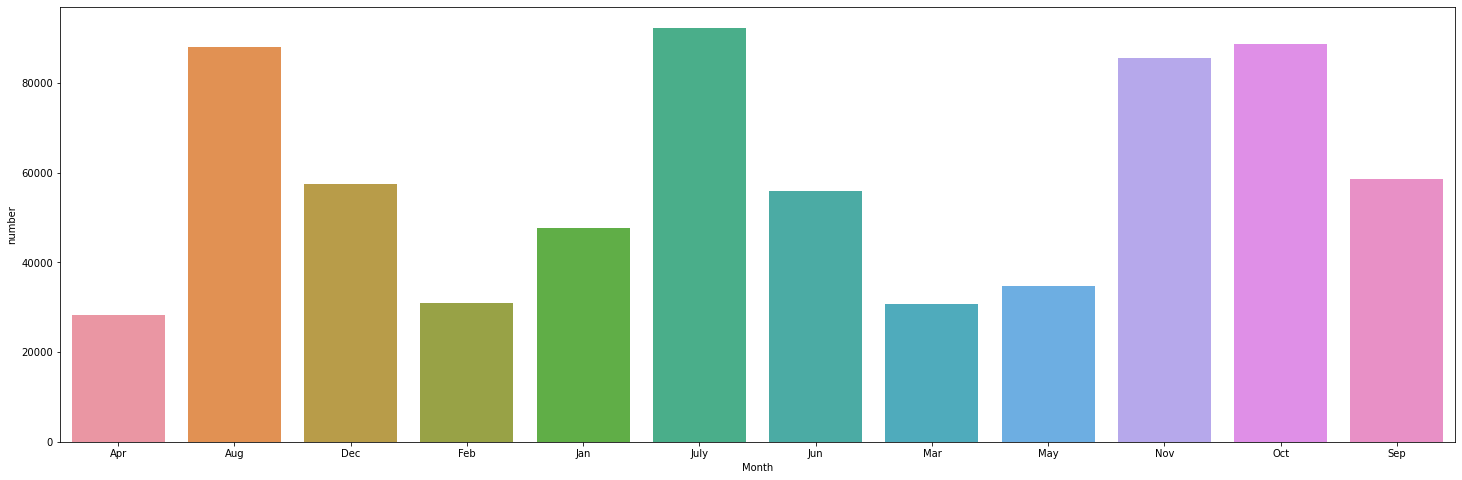

In [503]:
plt.figure(figsize=(25,8))
sns.barplot(x='Month',y='number',data=Max_f)
plt.xlabel('Month')
plt.ylabel('number')

# Finding in which year maximum number of Forest Fires Were Repoprted

In [504]:
Data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month'], dtype='object')

In [505]:
Max_y = Data.groupby('year')['number'].sum().reset_index()
Max_y

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


Text(0, 0.5, 'number')

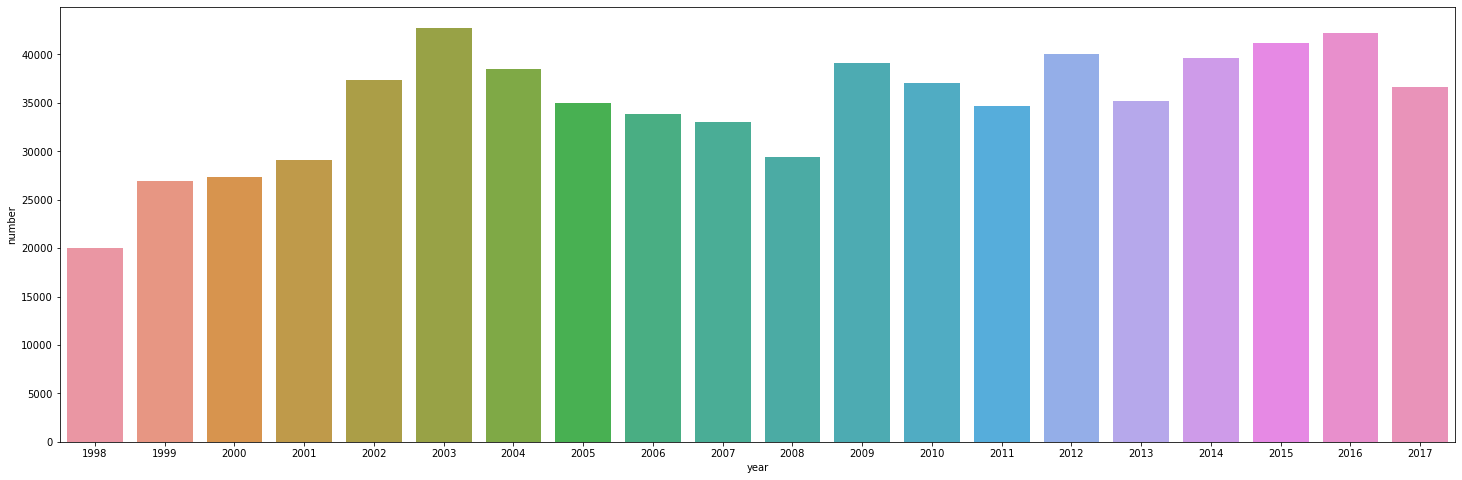

In [506]:
plt.figure(figsize=(25,8))
sns.barplot(x='year',y='number',data=Max_y)
plt.xlabel('year')
plt.ylabel('number')

# Finding in which State maximum number of Forest Fires were reported

In [507]:
Data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month'], dtype='object')

In [508]:
Max_s = Data.groupby('state')['number'].sum().reset_index()
Max_s

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Acre'),
  Text(1, 0, 'Alagoas'),
  Text(2, 0, 'Amapa'),
  Text(3, 0, 'Amazonas'),
  Text(4, 0, 'Bahia'),
  Text(5, 0, 'Ceara'),
  Text(6, 0, 'Distrito Federal'),
  Text(7, 0, 'Espirito Santo'),
  Text(8, 0, 'Goias'),
  Text(9, 0, 'Maranhao'),
  Text(10, 0, 'Mato Grosso'),
  Text(11, 0, 'Minas Gerais'),
  Text(12, 0, 'Paraiba'),
  Text(13, 0, 'Pará'),
  Text(14, 0, 'Pernambuco'),
  Text(15, 0, 'Piau'),
  Text(16, 0, 'Rio'),
  Text(17, 0, 'Rondonia'),
  Text(18, 0, 'Roraima'),
  Text(19, 0, 'Santa Catarina'),
  Text(20, 0, 'Sao Paulo'),
  Text(21, 0, 'Sergipe'),
  Text(22, 0, 'Tocantins')])

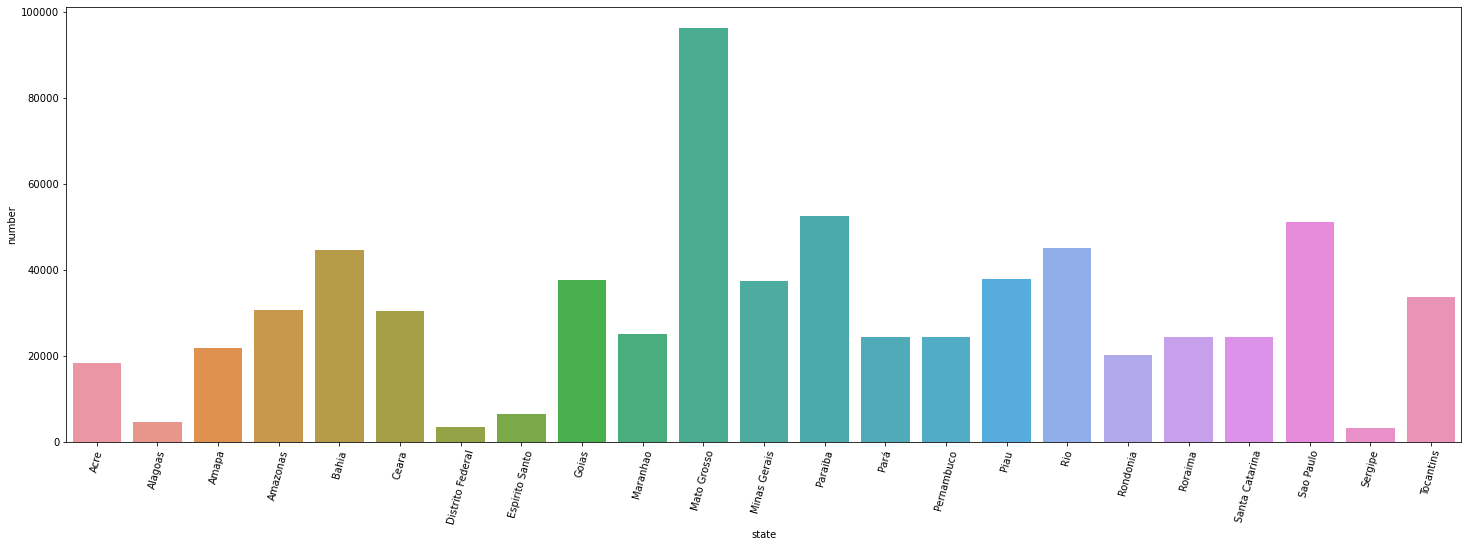

In [509]:
plt.figure(figsize=(25,8))
sns.barplot(x='state',y='number',data=Max_s)
plt.xlabel('state')
plt.ylabel('number')
plt.xticks(rotation = 75)

# Finding Total number of Fires were Reported in Amazonas

In [510]:
Data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month'], dtype='object')

In [511]:
Data[Data['state']=='Amazonas']['number'].sum()

30650.129

# Displaying Number of fires were reported in amazonas (year wise)

In [512]:
Ama = Data[Data['state']=='Amazonas']
Ama.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


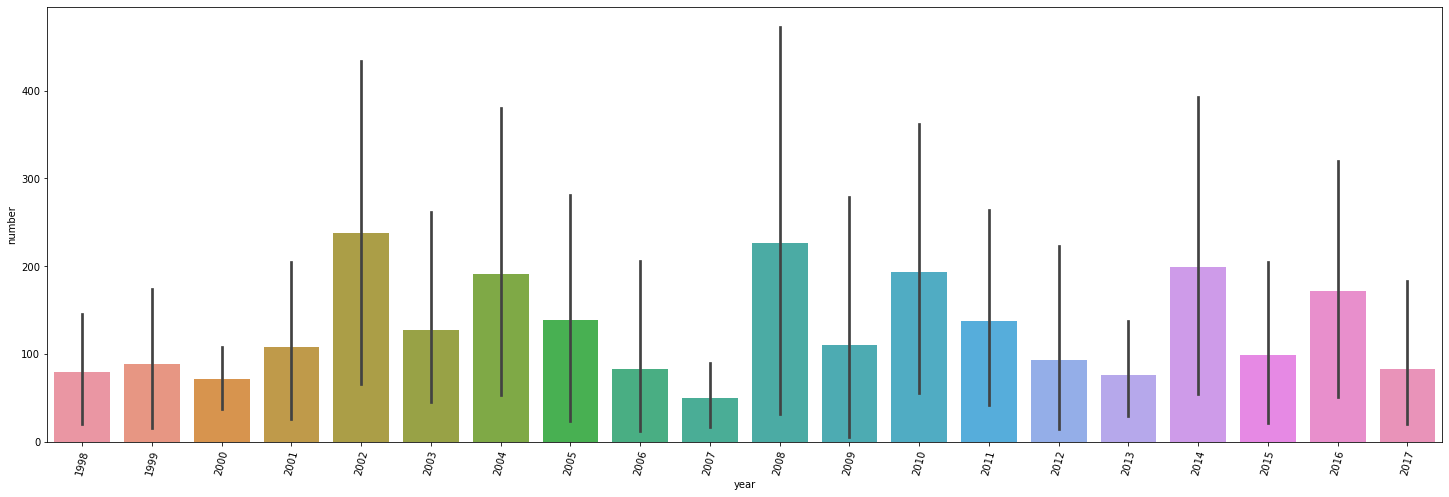

In [513]:
plt.figure(figsize=(25,8))
sns.barplot(x='year',y='number',data=Ama)
plt.xlabel('year')
plt.ylabel('number')
plt.xticks(rotation = 75)
plt.show()

# Finding number of Fires were reported in amazonas ( day wise)

In [514]:
Ama_D= Data[Data['state']=='Amazonas']
A_D = Ama_D.groupby(Data['date'].dt.dayofweek)['number'].sum().reset_index()

In [515]:
A_D['date'] = A_D['date'].map({0:'Monday',
                   1:'Tuesday',
                   2:'Wednesday',
                   3:'Thursday',
                   4:'Friday',
                   5:'Saturday',
                   6:'Sunday'
                   })

In [516]:
A_D

,date,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


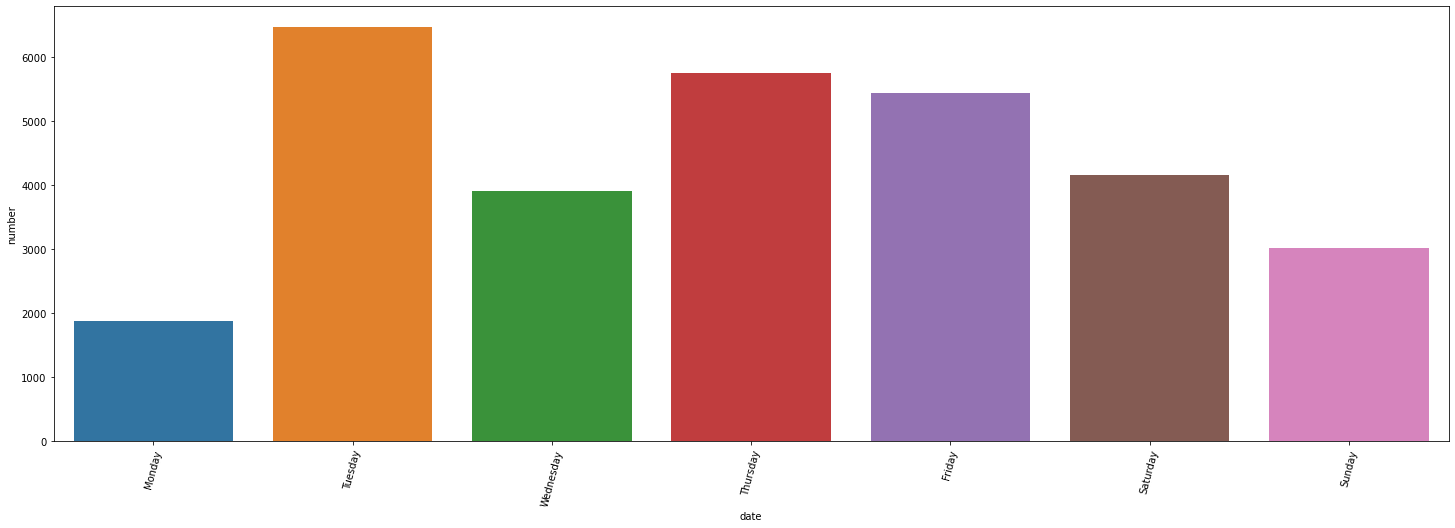

In [517]:
plt.figure(figsize=(25,8))
sns.barplot(x='date',y='number',data=A_D)
plt.xlabel('date')
plt.ylabel('number')
plt.xticks(rotation = 75)
plt.show()

# Finding the total number of reported in 2015 and Visualize data based on Each ' Month'

In [518]:
Data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month'], dtype='object')

In [519]:
D_M = Data[Data['year']==2015]
F_D_M = D_M.groupby('Month')['number'].sum().reset_index()
F_D_M

,Month,number
0,Apr,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,July,4364.392
6,Jun,3260.552
7,Mar,2202.000
8,May,2384.000
9,Nov,4034.518


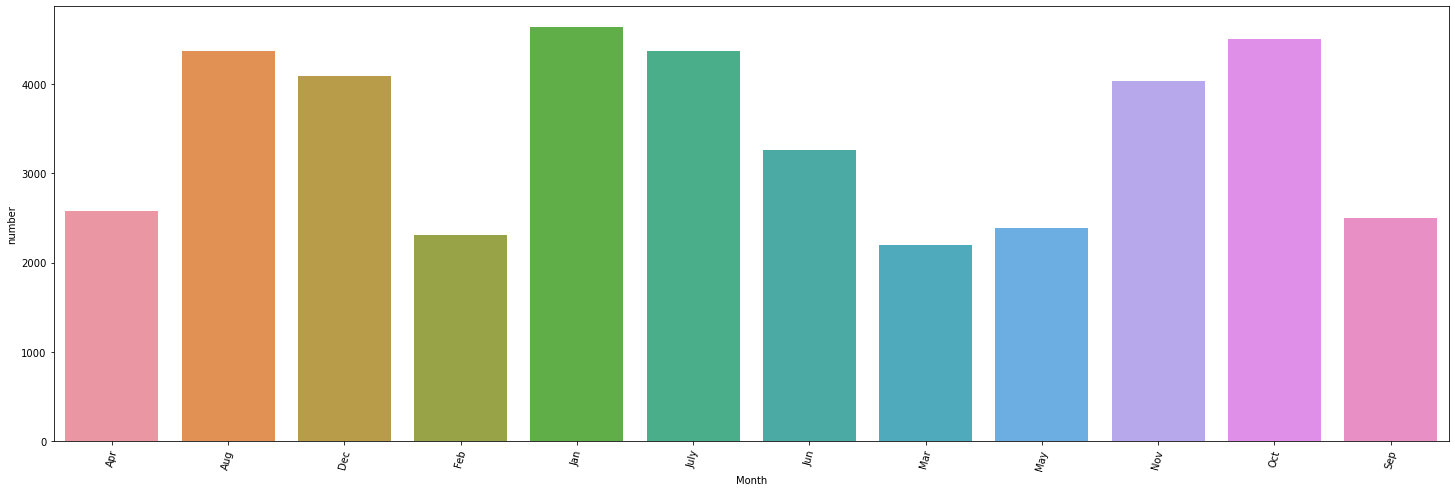

In [520]:
plt.figure(figsize=(25,8))
sns.barplot(x='Month',y='number',data=F_D_M)
plt.xlabel('Month')
plt.ylabel('number')
plt.xticks(rotation = 75)
plt.show()

# Finding average number of Fires  were reported From Highest to lowest(State wise)

In [521]:
Data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month'], dtype='object')

In [522]:
S = Data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
S

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


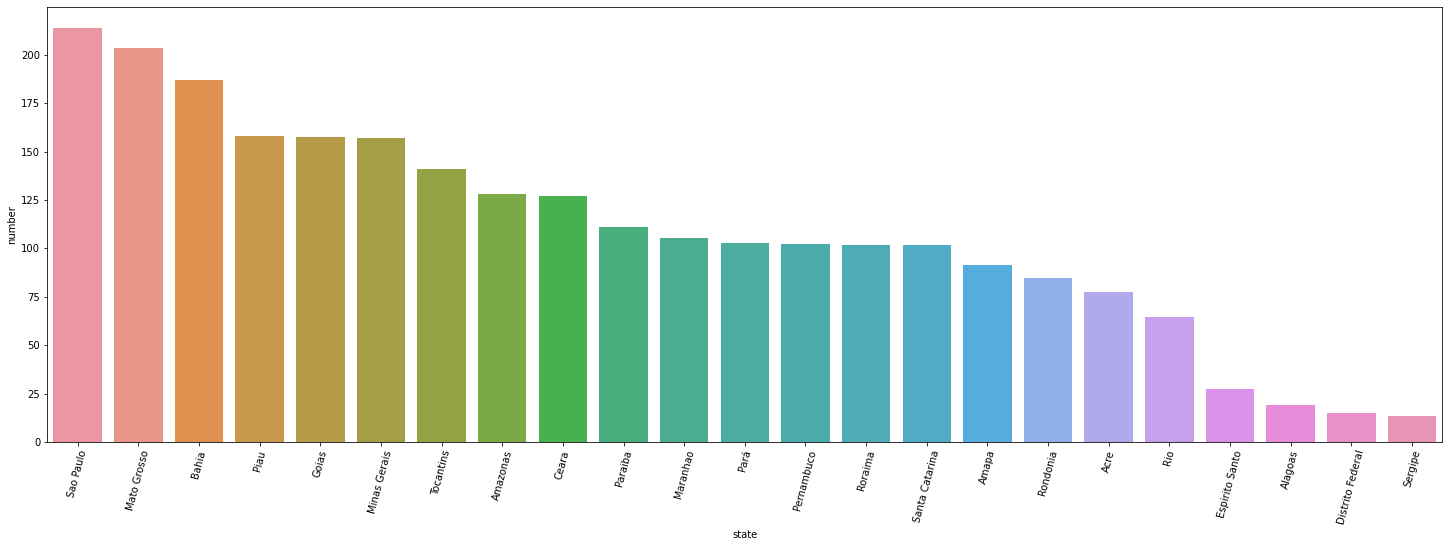

In [523]:
plt.figure(figsize=(25,8))
sns.barplot(x='state',y='number',data=S)
plt.xlabel('state')
plt.ylabel('number')
plt.xticks(rotation = 75)
plt.show()

# Finding the State names where fires were reported in ' dec' month

In [524]:
Data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month'], dtype='object')

In [525]:
Data['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [526]:
Data[Data['Month'] == 'Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)